In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

###1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [3]:
election_data_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")
election_data_df.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


Removing unwanted column "Unnamed: 0"

Renaming columns names : replacing dots with hyphen

In [4]:
election_data_df.drop(['Unnamed: 0'],axis=1,inplace=True)
election_data_df.rename(columns={"economic.cond.national":"economic_cond_national","economic.cond.household":"economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)

In [5]:
election_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
election_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [7]:
election_data_df.shape

(1525, 9)

In [8]:
election_data_df.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [9]:
election_data_df[election_data_df.duplicated()==True]

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
election_data_df.duplicated().sum()
election_data_df.drop_duplicates(inplace=True,keep="first")
print("Count of records after duplicate removal: ",election_data_df.shape[0])

Count of records after duplicate removal:  1517


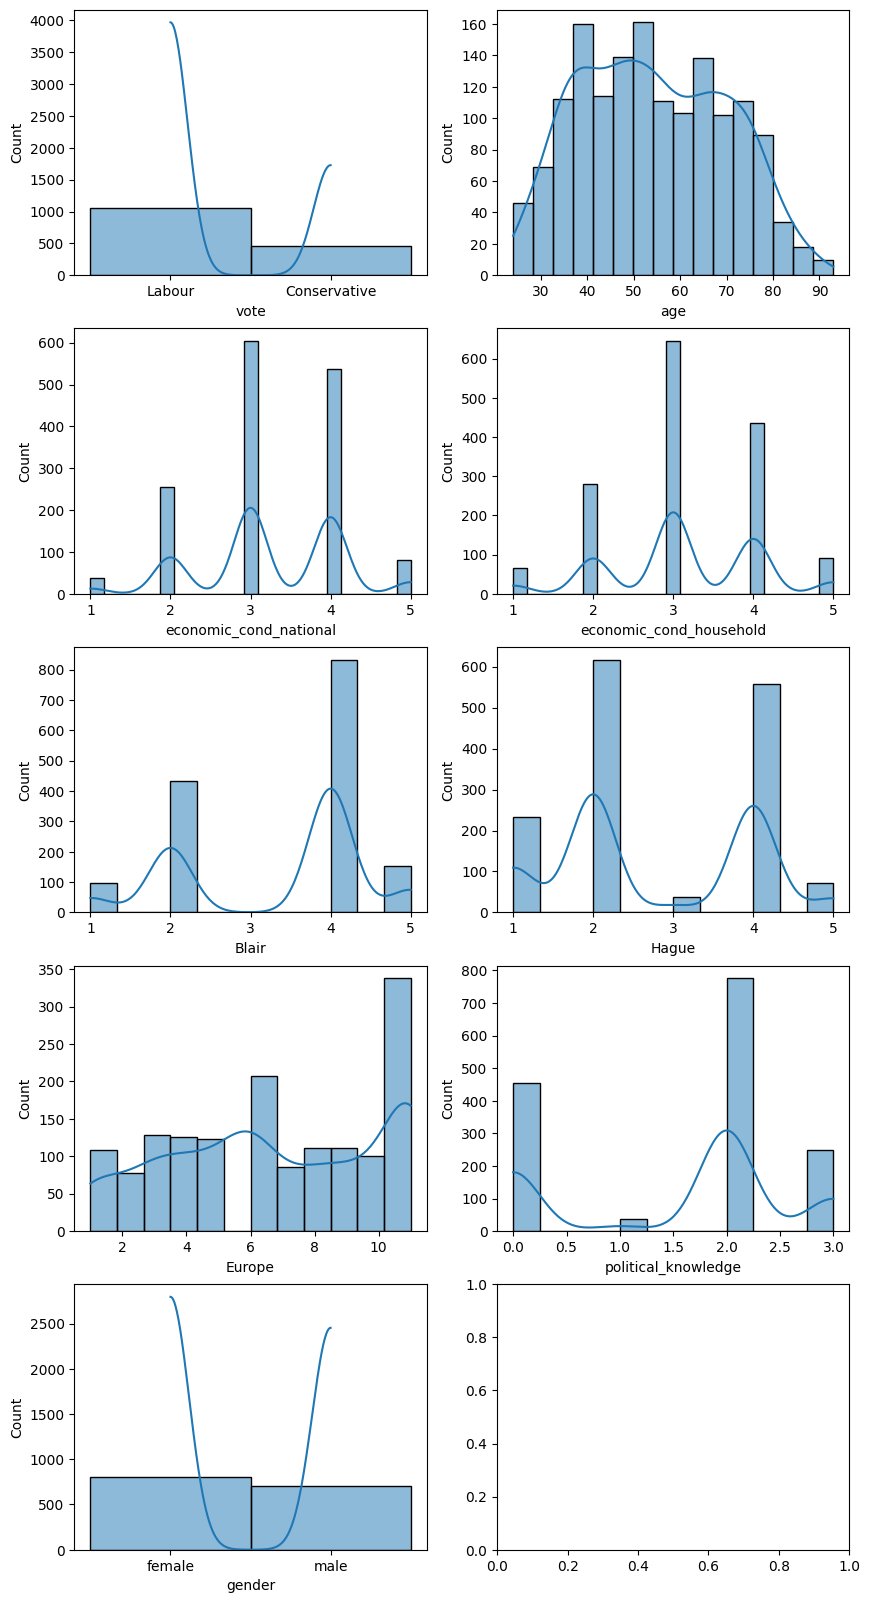

In [11]:
fig, ax = plt.subplots(nrows=5,ncols=2, sharey=False,figsize=(10,20))
h=0
v=0

for i in election_data_df.columns:
  sns.histplot(data=election_data_df,x=i,kde=True, ax=ax[h][v])
  if v==1:
    v=0
    h=h+1
  else:
    v=v+1



In [12]:
election_data_df.skew(axis=0,numeric_only=True)

age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
dtype: float64

###1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

Heatmap to check for correlation

<ipython-input-13-200252ace7f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(election_data_df.corr(),annot=True);


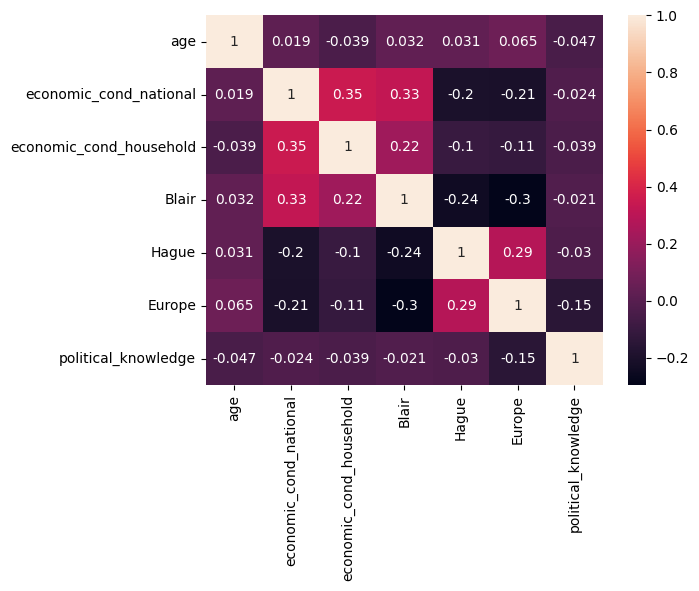

In [13]:
sns.heatmap(election_data_df.corr(),annot=True);

Univariate Analysis

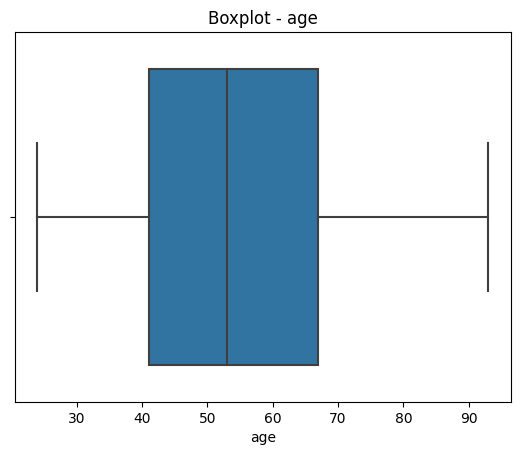

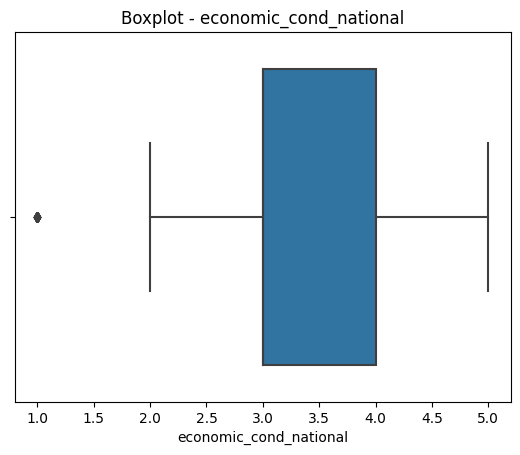

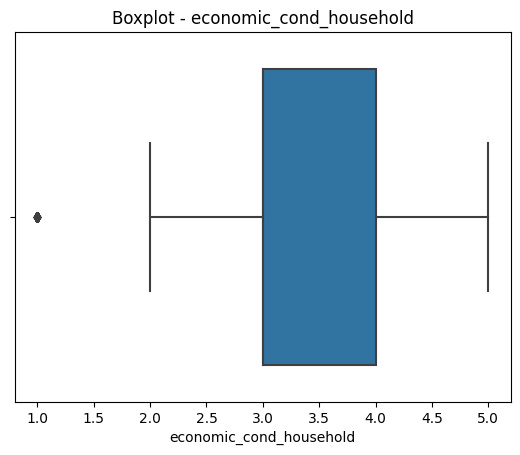

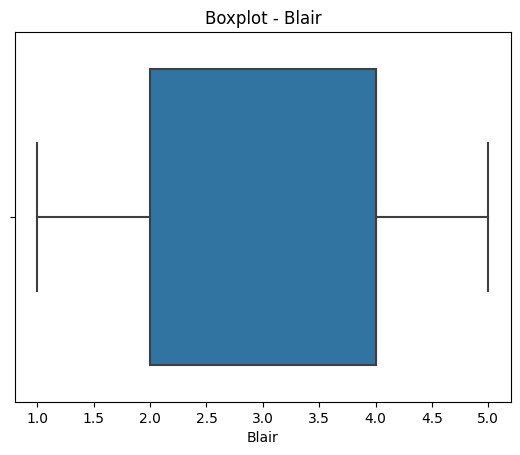

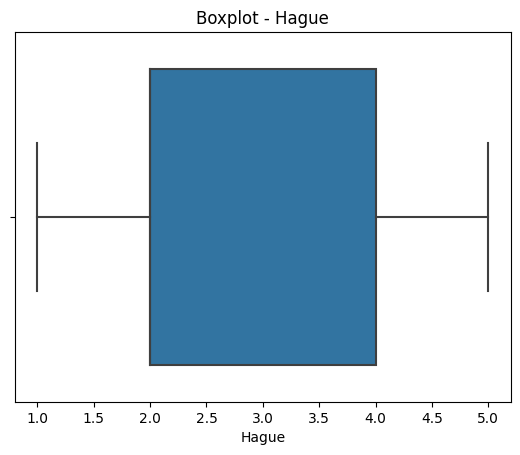

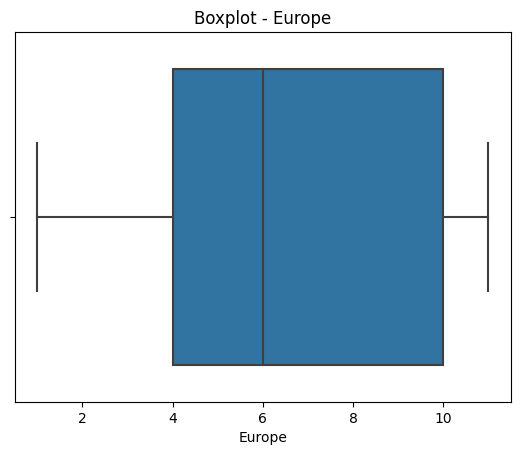

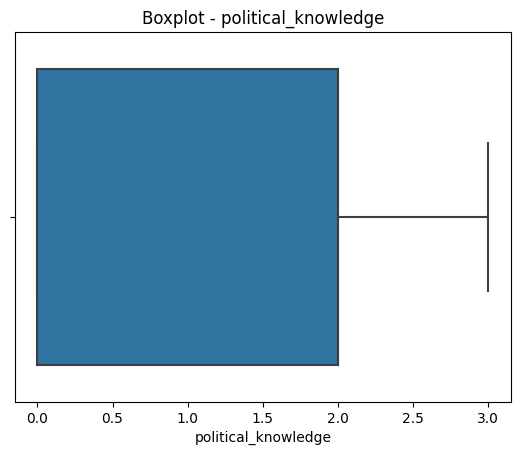

In [14]:
num_columns = election_data_df.select_dtypes(exclude='object').columns
num_columns

for i in num_columns:
  plt.title("Boxplot - "+i)
  sns.boxplot(x=election_data_df[i])
  plt.show()
  print("",end="\n")





Bivariate Analysis

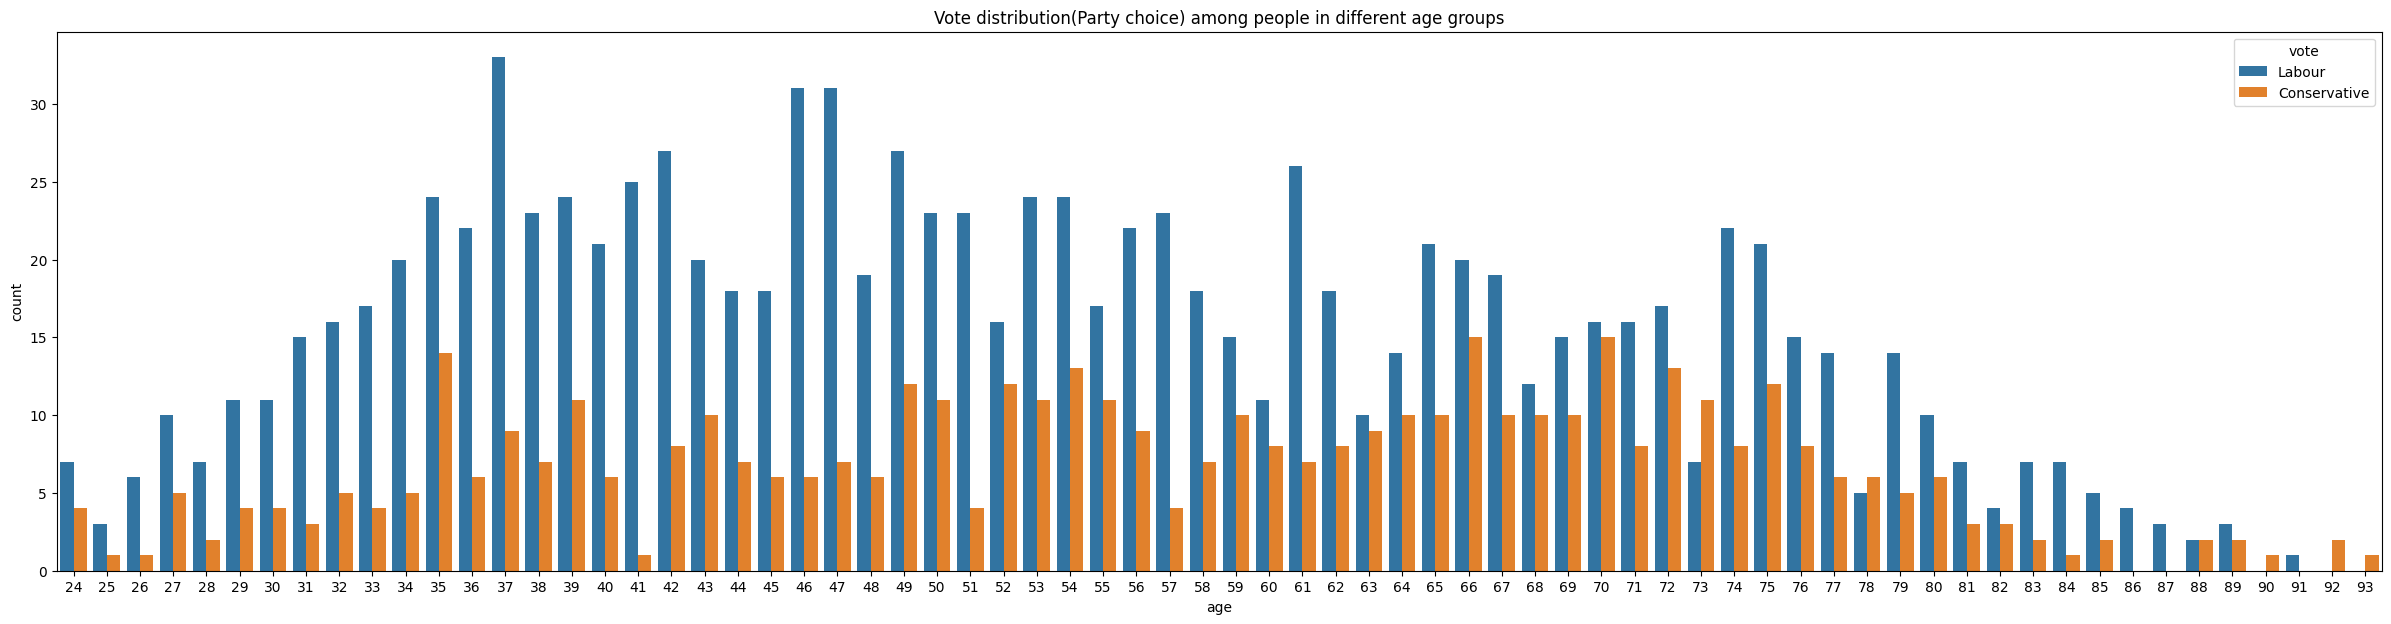

In [15]:
plt.figure(figsize=(30,7))
plt.title("Vote distribution(Party choice) among people in different age groups")
sns.countplot(data=election_data_df,x='age',hue='vote',dodge=True);

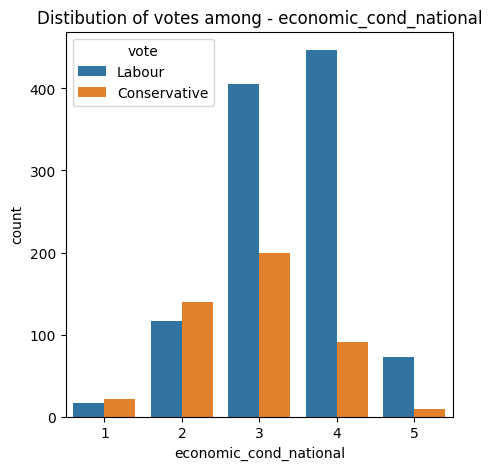

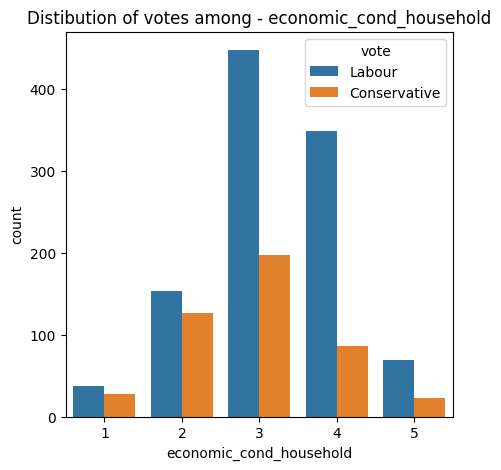

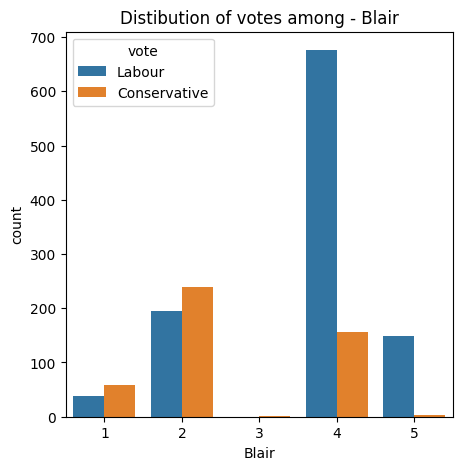

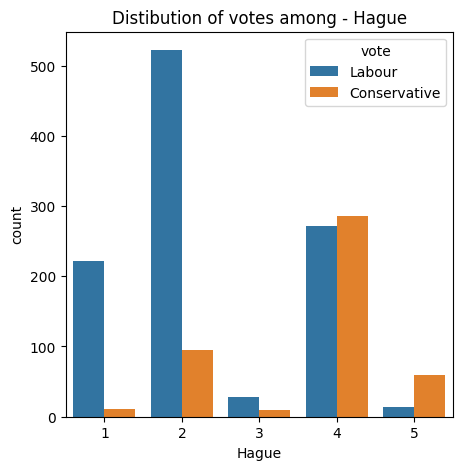

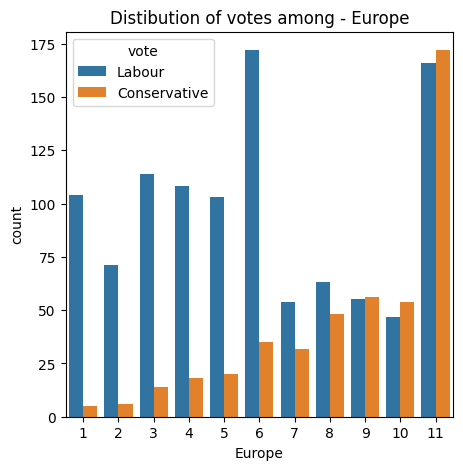

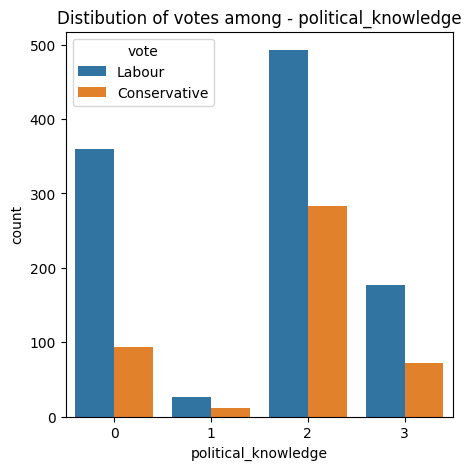

In [16]:
for i in num_columns[1:]:
  plt.figure(figsize=(5,5))
  plt.title("Distibution of votes among - "+i)
  sns.countplot(data=election_data_df,x=i,hue='vote')
  plt.show()
  print("",end='\n')

Outlier Proportion

In [17]:
def detectOutlier(colmn):
  Q1= np.percentile(colmn,25)
  Q3 = np.percentile(colmn,75)
  IQR = Q3-Q1
  lr = Q1-(1.5*IQR)
  ur = Q3+(1.5*IQR)
  return lr,ur
for i in num_columns:
  lr,ur = detectOutlier(election_data_df[i])
  print("Number of outliers in column "+i+" is ",election_data_df[(election_data_df[i]<lr) | (election_data_df[i]>ur)].shape[0])




Number of outliers in column age is  0
Number of outliers in column economic_cond_national is  37
Number of outliers in column economic_cond_household is  65
Number of outliers in column Blair is  0
Number of outliers in column Hague is  0
Number of outliers in column Europe is  0
Number of outliers in column political_knowledge is  0


In [18]:
print("Proportion of outliers in economic_cond_national column: ",np.round((37/election_data_df.shape[0])*100,2))
print("Proportion of outliers in economic_cond_national column: ",np.round((65/election_data_df.shape[0])*100,2))



Proportion of outliers in economic_cond_national column:  2.44
Proportion of outliers in economic_cond_national column:  4.28


###1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

Converting nominal data in columns vote and gender to categorical columns using one hot encoding.



In [19]:
election_data_df[['vote','gender']].head()

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male


In [20]:

df=election_data_df.copy(deep=True)
df=pd.get_dummies(data=df,columns=['gender','vote'],drop_first=True)
df.head()
#df.vote_Labour = df.vote_Labour.astype('category')
#df.gender_male = df.gender_male.astype('category')
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic_cond_national   1517 non-null   int64
 2   economic_cond_household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political_knowledge      1517 non-null   int64
 7   gender_male              1517 non-null   uint8
 8   vote_Labour              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 97.8 KB


In [21]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
Y = df.pop('vote_Labour')



Scaling here is necessary as we will be using distance based algorithms in further steps.

In [22]:
X.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [23]:
from scipy.stats import zscore
X = X.apply(zscore)

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)


In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1061, 8)
(456, 8)
(1061,)
(456,)


###1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Logistic Regression Model

In [26]:

LR_Model = LogisticRegression(solver='liblinear',random_state=1)
LR_Model.fit(X_train,Y_train)
print("Logistic Regression Model score on train data: ",np.round(LR_Model.score(X_train,Y_train),2))
print("Logistic Regression Model score on test data: ",np.round(LR_Model.score(X_test,Y_test),2))
#Confusion matrix on Test data
LR_cm = confusion_matrix(Y_test,LR_Model.predict(X_test))
#Classification report on Test data
LR_cr = classification_report(Y_test,LR_Model.predict(X_test))
print(LR_cm)
print("Classfication report of LR Model on test data: \n",LR_cr)

Logistic Regression Model score on train data:  0.84
Logistic Regression Model score on test data:  0.84
[[ 88  50]
 [ 24 294]]
Classfication report of LR Model on test data: 
               precision    recall  f1-score   support

           0       0.79      0.64      0.70       138
           1       0.85      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



Linear Discrimant Analysis(LDA) model

In [27]:
LDA_Model = LinearDiscriminantAnalysis()
LDA_Model.fit(X_train,Y_train)
print("Linear Discriminant Analysis Model score on train data: ",np.round(LDA_Model.score(X_train,Y_train),2))
print("Linear Discriminant Analysis Model score on test data: ",np.round(LDA_Model.score(X_test,Y_test),2))

#Confusion matrix on Test data
LDA_cm = confusion_matrix(Y_test,LDA_Model.predict(X_test))
#Classification report on Test data
LDA_cr = classification_report(Y_test,LDA_Model.predict(X_test))
print(LDA_cm)
print("Classfication report of LDA Model on test data: \n",LDA_cr)

Linear Discriminant Analysis Model score on train data:  0.84
Linear Discriminant Analysis Model score on test data:  0.84
[[ 91  47]
 [ 25 293]]
Classfication report of LDA Model on test data: 
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



In [28]:
Y.value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

###1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
KNN_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(X_train,Y_train)

print("KNN Model score on train data: ",np.round(KNN_Model.score(X_train,Y_train),2))
print("KNN Model score on test data: ",np.round(KNN_Model.score(X_test,Y_test),2))
#Confusion matrix on Test data
KNN_cm = confusion_matrix(Y_test,KNN_Model.predict(X_test))
#Classification report on Test data
KNN_cr = classification_report(Y_test,KNN_Model.predict(X_test))
print(KNN_cm)
print("Classfication report of KNN Model on test data: \n",KNN_cr)

KNN Model score on train data:  0.86
KNN Model score on test data:  0.83
[[ 90  48]
 [ 31 287]]
Classfication report of KNN Model on test data: 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456



Naive Bayes Model

In [31]:
NB_Model = GaussianNB()
NB_Model.fit(X_train,Y_train)

print("Naive Bayes Model score on train data: ",np.round(NB_Model.score(X_train,Y_train),2))
print("Naive Bayes Model score on test data: ",np.round(NB_Model.score(X_test,Y_test),2))
#Confusion matrix on Test data
NB_cm = confusion_matrix(Y_test,NB_Model.predict(X_test))
#Classification report on Test data
NB_cr = classification_report(Y_test,NB_Model.predict(X_test))
print(NB_cm)
print("Classfication report of KNN Model on test data: \n",NB_cr)

Naive Bayes Model score on train data:  0.84
Naive Bayes Model score on test data:  0.82
[[ 91  47]
 [ 35 283]]
Classfication report of KNN Model on test data: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       138
           1       0.86      0.89      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



###1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

In [32]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier


Model Tuning on Logistic Regression

In [33]:
lr = LogisticRegression()
parameters = [{'penalty':['l1','l2']},
              {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']} ,
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
LR_Tuned_Model = LogisticRegression(penalty='l2')
LR_Tuned_Model.fit(X_train,Y_train)
print("LR Model score on train data after tuning: ",LR_Tuned_Model.score(X_train,Y_train))
print("LR Model score on test data after tuning: ",LR_Tuned_Model.score(X_test,Y_test))

LR_Tuned_Model_CR = classification_report(Y_test,LR_Tuned_Model.predict(X_test))
print("Classification Report of Tuned LR Model on test data: \n",LR_Tuned_Model_CR)


{'penalty': 'l2'}
LR Model score on train data after tuning:  0.8360037700282752
LR Model score on test data after tuning:  0.8377192982456141
Classification Report of Tuned LR Model on test data: 
               precision    recall  f1-score   support

           0       0.79      0.64      0.70       138
           1       0.85      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.83      0.84      0.83       456



Model Tuning on Linear Discriminant Analysis

In [34]:
lda = LinearDiscriminantAnalysis()
parameters = [{'n_components':[1,2,3,4,5,6,7,8,9]},
              {'solver' : ['svd', 'lsqr', 'eigen']}]
grid_search = GridSearchCV(estimator = lda,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train,Y_train)
grid_search.best_params_
LDA_Tuned_Model = LinearDiscriminantAnalysis(n_components=1)
LDA_Tuned_Model.fit(X_train,Y_train)
print("LDA Model score on train data after tuning: ",LDA_Tuned_Model.score(X_train,Y_train))
print("LDA Model score on test data after tuning: ",LDA_Tuned_Model.score(X_test,Y_test))

LDA_Tuned_Model_CR = classification_report(Y_test,LDA_Tuned_Model.predict(X_test))
print("Classification Report of Tuned LDA Model on test data: \n",LDA_Tuned_Model_CR)

LDA Model score on train data after tuning:  0.8369462770970783
LDA Model score on test data after tuning:  0.8421052631578947
Classification Report of Tuned LDA Model on test data: 
               precision    recall  f1-score   support

           0       0.78      0.66      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



Model Building and Tuning on Bagging Classifier

In [35]:
bc = BaggingClassifier()
parameters = {
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],
 'n_estimators': [5, 10, 15],
 'max_samples' : [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator = bc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train,Y_train)
grid_search.best_params_
BC_Tuned_Model = BaggingClassifier(estimator=RandomForestClassifier(), bootstrap=True, bootstrap_features=False,max_samples=0.6,n_estimators=15)
BC_Tuned_Model.fit(X_train,Y_train)
print("BC Model score on train data after tuning: ",BC_Tuned_Model.score(X_train,Y_train))
print("BC Model score on test data after tuning: ",BC_Tuned_Model.score(X_test,Y_test))

BC_Tuned_Model_CR = classification_report(Y_test,BC_Tuned_Model.predict(X_test))
print("Classification Report of Tuned BC Model on test data: \n",BC_Tuned_Model_CR)

BC Model score on train data after tuning:  0.9387370405278039
BC Model score on test data after tuning:  0.8223684210526315
Classification Report of Tuned BC Model on test data: 
               precision    recall  f1-score   support

           0       0.76      0.60      0.67       138
           1       0.84      0.92      0.88       318

    accuracy                           0.82       456
   macro avg       0.80      0.76      0.78       456
weighted avg       0.82      0.82      0.82       456



Model Tuning on ADABoost classifier

In [36]:
adac = AdaBoostClassifier(random_state=1)
parameters = {
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

grid_search = GridSearchCV(estimator=adac,param_grid=parameters)
grid_search.fit(X_train,Y_train)
grid_search.best_params_
ADAC_Tuned_Model = AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)
ADAC_Tuned_Model.fit(X_train,Y_train)
print("ADAC Model score on train data after tuning: ",ADAC_Tuned_Model.score(X_train,Y_train))
print("ADAC Model score on test data after tuning: ",ADAC_Tuned_Model.score(X_test,Y_test))

ADAC_Tuned_Model_CR = classification_report(Y_test,ADAC_Tuned_Model.predict(X_test))
print("Classification Report of Tuned ADABoost Model on test data: \n",ADAC_Tuned_Model_CR)

ADAC Model score on train data after tuning:  0.8322337417530632
ADAC Model score on test data after tuning:  0.8267543859649122
Classification Report of Tuned ADABoost Model on test data: 
               precision    recall  f1-score   support

           0       0.81      0.56      0.66       138
           1       0.83      0.94      0.88       318

    accuracy                           0.83       456
   macro avg       0.82      0.75      0.77       456
weighted avg       0.82      0.83      0.82       456



###1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve

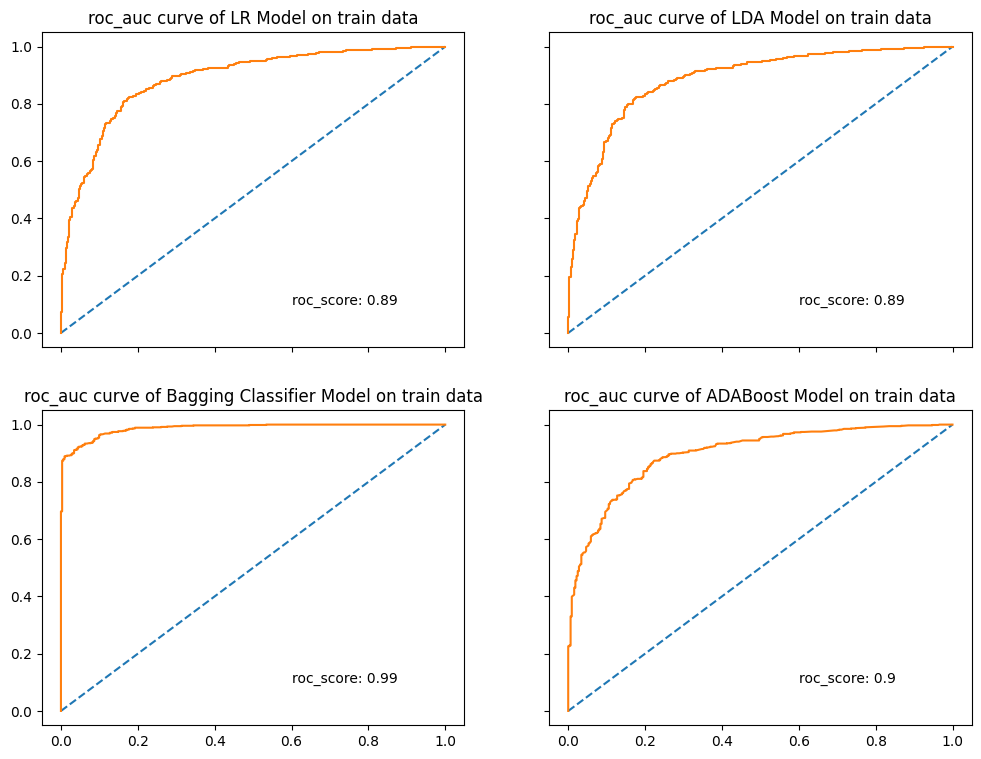

In [38]:
fig,axes = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(12,9))
#roc_auc_score on train data
LR_Tuned_Model_roc_auc_train = roc_auc_score(Y_train,LR_Tuned_Model.predict_proba(X_train)[:,1:])
fpr, tpr, threshold = roc_curve(Y_train,LR_Tuned_Model.predict_proba(X_train)[:,1:])

axes[0][0].set_title("roc_auc curve of LR Model on train data")
axes[0][0].plot([0, 1], [0, 1], linestyle='--')
axes[0][0].text(0.6, 0.1, "roc_score: "+str(np.round(LR_Tuned_Model_roc_auc_train,2)), fontdict=None)
# plot the roc curve for the model
axes[0][0].plot(fpr, tpr);
#axes[0][0].plt.show();

LDA_Tuned_Model_roc_auc_train = roc_auc_score(Y_train,LDA_Tuned_Model.predict_proba(X_train)[:,1:])
fpr, tpr, threshold = roc_curve(Y_train,LDA_Tuned_Model.predict_proba(X_train)[:,1:])

axes[0][1].set_title("roc_auc curve of LDA Model on train data")
axes[0][1].plot([0, 1], [0, 1], linestyle='--')
axes[0][1].text(0.6, 0.1, "roc_score: "+str(np.round(LDA_Tuned_Model_roc_auc_train,2)), fontdict=None)
# plot the roc curve for the model
axes[0][1].plot(fpr, tpr);


BC_Tuned_Model_roc_auc_train = roc_auc_score(Y_train,BC_Tuned_Model.predict_proba(X_train)[:,1:])
fpr, tpr, threshold = roc_curve(Y_train,BC_Tuned_Model.predict_proba(X_train)[:,1:])

axes[1][0].set_title("roc_auc curve of Bagging Classifier Model on train data")
axes[1][0].plot([0, 1], [0, 1], linestyle='--')
axes[1][0].text(0.6, 0.1, "roc_score: "+str(np.round(BC_Tuned_Model_roc_auc_train,2)), fontdict=None)
# plot the roc curve for the model
axes[1][0].plot(fpr, tpr);



ADAC_Tuned_Model_roc_auc_train = roc_auc_score(Y_train,ADAC_Tuned_Model.predict_proba(X_train)[:,1:])
fpr, tpr, threshold = roc_curve(Y_train,ADAC_Tuned_Model.predict_proba(X_train)[:,1:])

axes[1][1].set_title("roc_auc curve of ADABoost Model on train data")
axes[1][1].plot([0, 1], [0, 1], linestyle='--')
axes[1][1].text(0.6, 0.1, "roc_score: "+str(np.round(ADAC_Tuned_Model_roc_auc_train,2)), fontdict=None)
# plot the roc curve for the model
axes[1][1].plot(fpr, tpr);


# RFC_Tuned_Model_roc_auc_train = roc_auc_score(Y_train,RFC_Tuned_Model.predict_proba(X_train)[:,1:])
# fpr, tpr, threshold = roc_curve(Y_train,RFC_Tuned_Model.predict_proba(X_train)[:,1:])

# axes[2][0].set_title("roc_auc curve of Random Forest Model on train data")
# axes[2][0].plot([0, 1], [0, 1], linestyle='--')
# axes[2][0].text(0.6, 0.1, "roc_score: "+str(np.round(RFC_Tuned_Model_roc_auc_train,2)), fontdict=None)
# # plot the roc curve for the model
# axes[2][0].plot(fpr, tpr);
# axes[2,1].set_axis_off()




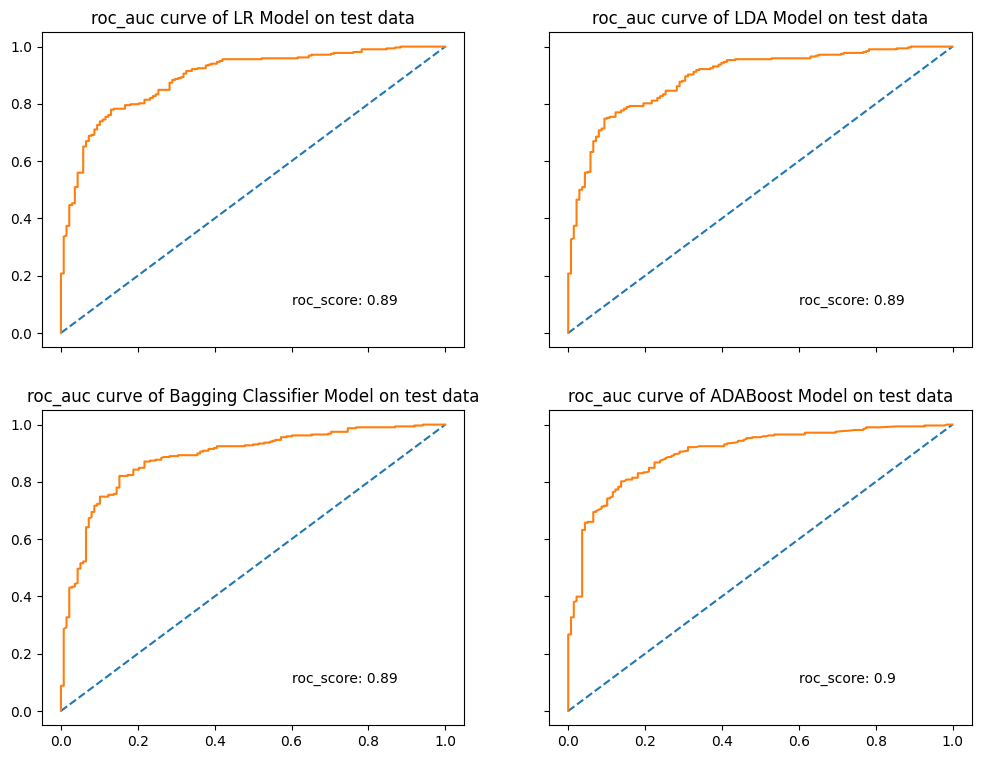

In [39]:
fig,axes = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(12,9))
#roc_auc_score on test data
LR_Tuned_Model_roc_auc_test = roc_auc_score(Y_test,LR_Tuned_Model.predict_proba(X_test)[:,1:])
fpr, tpr, threshold = roc_curve(Y_test,LR_Tuned_Model.predict_proba(X_test)[:,1:])

axes[0][0].set_title("roc_auc curve of LR Model on test data")
axes[0][0].plot([0, 1], [0, 1], linestyle='--')
axes[0][0].text(0.6, 0.1, "roc_score: "+str(np.round(LR_Tuned_Model_roc_auc_test,2)), fontdict=None)
# plot the roc curve for the model
axes[0][0].plot(fpr, tpr);
#axes[0][0].plt.show();

LDA_Tuned_Model_roc_auc_test = roc_auc_score(Y_test,LDA_Tuned_Model.predict_proba(X_test)[:,1:])
fpr, tpr, threshold = roc_curve(Y_test,LDA_Tuned_Model.predict_proba(X_test)[:,1:])

axes[0][1].set_title("roc_auc curve of LDA Model on test data")
axes[0][1].plot([0, 1], [0, 1], linestyle='--')
axes[0][1].text(0.6, 0.1, "roc_score: "+str(np.round(LDA_Tuned_Model_roc_auc_test,2)), fontdict=None)
# plot the roc curve for the model
axes[0][1].plot(fpr, tpr);


BC_Tuned_Model_roc_auc_test = roc_auc_score(Y_test,BC_Tuned_Model.predict_proba(X_test)[:,1:])
fpr, tpr, threshold = roc_curve(Y_test,BC_Tuned_Model.predict_proba(X_test)[:,1:])

axes[1][0].set_title("roc_auc curve of Bagging Classifier Model on test data")
axes[1][0].plot([0, 1], [0, 1], linestyle='--')
axes[1][0].text(0.6, 0.1, "roc_score: "+str(np.round(BC_Tuned_Model_roc_auc_test,2)), fontdict=None)
# plot the roc curve for the model
axes[1][0].plot(fpr, tpr);



ADAC_Tuned_Model_roc_auc_test = roc_auc_score(Y_test,ADAC_Tuned_Model.predict_proba(X_test)[:,1:])
fpr, tpr, threshold = roc_curve(Y_test,ADAC_Tuned_Model.predict_proba(X_test)[:,1:])

axes[1][1].set_title("roc_auc curve of ADABoost Model on test data")
axes[1][1].plot([0, 1], [0, 1], linestyle='--')
axes[1][1].text(0.6, 0.1, "roc_score: "+str(np.round(ADAC_Tuned_Model_roc_auc_test,2)), fontdict=None)
# plot the roc curve for the model
axes[1][1].plot(fpr, tpr);


# RFC_Tuned_Model_roc_auc_test = roc_auc_score(Y_test,RFC_Tuned_Model.predict_proba(X_test)[:,1:])
# fpr, tpr, threshold = roc_curve(Y_test,RFC_Tuned_Model.predict_proba(X_test)[:,1:])

# axes[2][0].set_title("roc_auc curve of Random Forest Model on test data")
# axes[2][0].plot([0, 1], [0, 1], linestyle='--')
# axes[2][0].text(0.6, 0.1, "roc_score: "+str(np.round(RFC_Tuned_Model_roc_auc_test,2)), fontdict=None)
# # plot the roc curve for the model
# axes[2][0].plot(fpr, tpr);
# axes[2,1].set_axis_off()




###1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

In [39]:
#Please refer report for inferences


##Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [ ]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

import numpy as np
import pandas as pd

import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

###2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [169]:
roosevelt_speech = inaugural.raw('1941-Roosevelt.txt')
nixon_speech = inaugural.raw('1973-Nixon.txt')
kennedy_speech = inaugural.raw('1961-Kennedy.txt')

In [212]:
data={'speech_from':['roosevelt_speech','nixon_speech','kennedy_speech'],'original_speech':[roosevelt_speech,nixon_speech,kennedy_speech]}
speech_df = pd.DataFrame(data)
speech_df

,speech_from,original_speech
0,roosevelt_speech,On each national day of inauguration since 178...
1,nixon_speech,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
2,kennedy_speech,"Vice President Johnson, Mr. Speaker, Mr. Chief..."


Counts before removing stopwords and special characters

In [213]:
speech_df['no_of_sentences'] = [len(x.split("\n\n")) for x in speech_df['original_speech']]
speech_df['no_of_words'] = [len(" ".join(x.split("\n\n")).split(" ")) for x in speech_df['original_speech']]
speech_df['no_of_char'] = [len(x) for x in speech_df['original_speech']]
speech_df

,speech_from,original_speech,no_of_sentences,no_of_words,no_of_char
0,roosevelt_speech,On each national day of inauguration since 178...,38,1360,7571
1,nixon_speech,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",51,1819,9991
2,kennedy_speech,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27,1390,7618


###2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [235]:
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)+['us','let']
speech_df['updated_sentence'] = [x.replace("\n\n"," ") for x in speech_df['original_speech']]
def remove_punc(df_col):
  return "".join(c for c in df_col if c not in list(string.punctuation))
def remove_stopwords(df_col):
  return " ".join(c.lower() for c in df_col.split(" ") if c.lower() not in stopwords)
speech_df['after_punc_removal'] = speech_df['updated_sentence'].apply(remove_punc)
speech_df['removed_stopwords'] = speech_df['after_punc_removal'].apply(remove_stopwords)
speech_df['removed_stopwords'] = [x.replace("  "," ") for x in speech_df['removed_stopwords']]
speech_df.drop(['updated_sentence','after_punc_removal'],axis=1,inplace=True)

In [236]:
speech_df['word_count_after_stopword'] = [len(x.split(" ")) for x in speech_df['removed_stopwords']]
speech_df['char_count_after_stopword'] = [len(x) for x in speech_df['removed_stopwords']]




Below are the character and words counts after removing stopwords and punctuations.

In [254]:
for i in speech_df['removed_stopwords']:
  print(i)

national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vita

Text for one of the speech after stopword removal

###2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [239]:

speech_df['word_freq'] = [nltk.FreqDist(x.split(" ")) for x in speech_df['removed_stopwords']]
speech_df

,speech_from,original_speech,no_of_sentences,no_of_words,no_of_char,removed_stopwords,word_count_after_stopword,char_count_after_stopword,word_freq
0,roosevelt_speech,On each national day of inauguration since 178...,38,1360,7571,national day inauguration since 1789 people re...,618,4563,"{'national': 2, 'day': 4, 'inauguration': 1, '..."
1,nixon_speech,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",51,1819,9991,mr vice president mr speaker mr chief justice ...,785,5785,"{'mr': 3, 'vice': 1, 'president': 1, 'speaker'..."
2,kennedy_speech,"Vice President Johnson, Mr. Speaker, Mr. Chief...",27,1390,7618,vice president johnson mr speaker mr chief jus...,666,4676,"{'vice': 2, 'president': 4, 'johnson': 1, 'mr'..."


Words occurring most number of times in Roosevelt's speech

In [240]:
speech_df[speech_df['speech_from']=='roosevelt_speech']['word_freq'][0].most_common(10)


[('nation', 11),
 ('know', 10),
 ('spirit', 9),
 ('democracy', 9),
 ('life', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6),
 ('human', 5)]

Words occurring most number of times in Nixon's speech

In [241]:
speech_df[speech_df['speech_from']=='nixon_speech']['word_freq'][1].most_common(10)

[('peace', 19),
 ('world', 16),
 ('new', 15),
 ('america', 13),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9),
 ('home', 9),
 ('abroad', 8),
 ('nation', 8)]

Words occurring most number of times in Kennedy's speech

In [243]:
speech_df[speech_df['speech_from']=='kennedy_speech']['word_freq'][2].most_common(10)


[('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5),
 ('nations', 5),
 ('ask', 5)]

###2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

Word Cloud for Roosevelt's Speech (after cleaning)!!

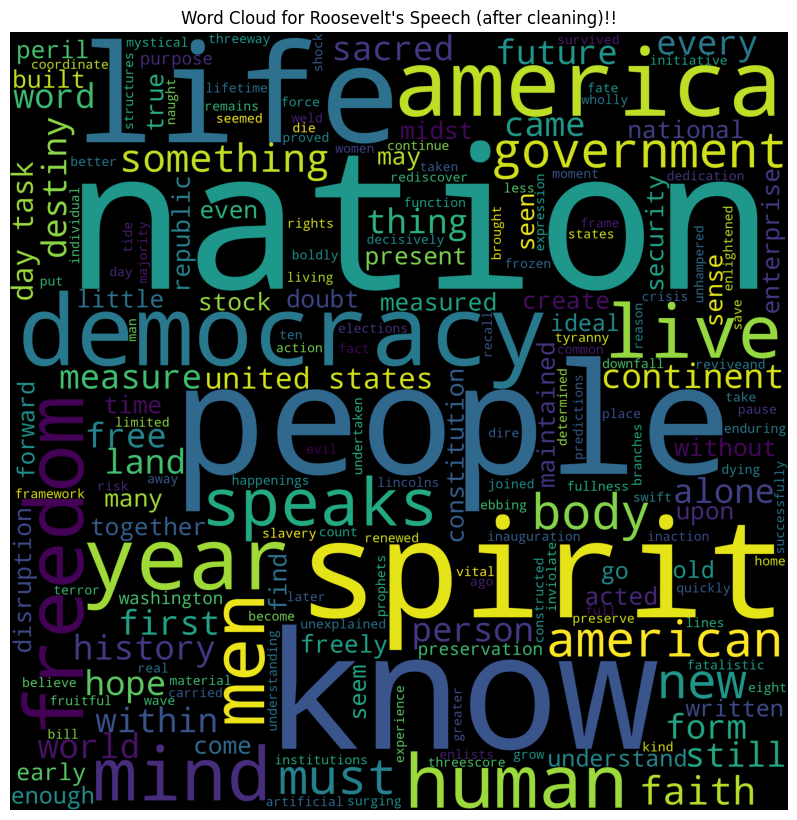

In [250]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(speech_df[speech_df['speech_from']=='roosevelt_speech']['removed_stopwords'].item())

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud for Roosevelt's Speech (after cleaning)!!")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)


plt.show()


Word Cloud for Nixon's Speech (after cleaning)!!

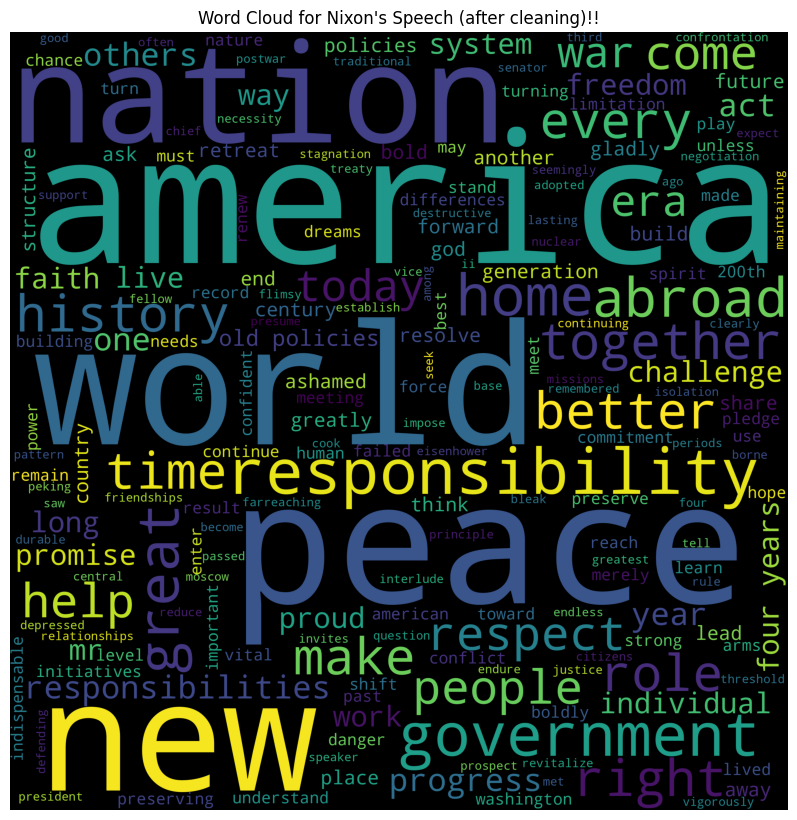

In [251]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(speech_df[speech_df['speech_from']=='nixon_speech']['removed_stopwords'].item())

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud for Nixon's Speech (after cleaning)!!")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)


plt.show()

Word Cloud for Kennedy's Speech (after cleaning)!!

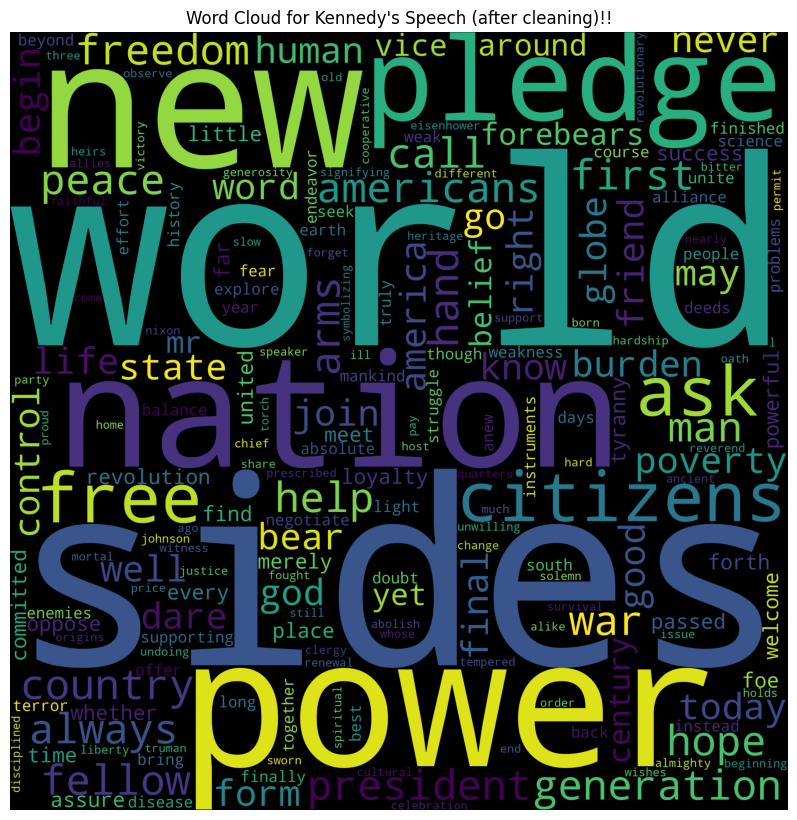

In [252]:
# Word Cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(speech_df[speech_df['speech_from']=='kennedy_speech']['removed_stopwords'].item())

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("Word Cloud for Kennedy's Speech (after cleaning)!!")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)


plt.show()